In [ ]:
# Step 0: Upload dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("student_performance.csv")




Saving student_performance.csv to student_performance (2).csv


In [ ]:
# Step 1: Data Understanding
print("First 5 rows:\n", df.head())
print("\nInfo:")
print(df.info())
print("\nDescription:\n", df.describe(include="all"))

First 5 rows:
    Hours_Studied  Previous_Scores Extracurricular  Sleep_Hours  \
0              2               40              No            6   
1              5               60             Yes            7   
2              8               85              No            8   
3              1               35              No            5   
4              6               75             Yes            7   

  Internet_Access  Attendance Performance  
0             Yes          70         Low  
1             Yes          80      Medium  
2             Yes          90        High  
3              No          60         Low  
4             Yes          85        High  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracurricular  20 non-null  

In [ ]:
# Step 2: Data Preprocessing
df_encoded = df.copy()
df_encoded["Extracurricular"] = df_encoded["Extracurricular"].map({"Yes": 1, "No": 0})
df_encoded["Internet_Access"] = df_encoded["Internet_Access"].map({"Yes": 1, "No": 0})
df_encoded["Performance"] = df_encoded["Performance"].map({"Low": 0, "Medium": 1, "High": 2})

X = df_encoded.drop("Performance", axis=1)
y = df_encoded["Performance"]

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 3: Model Building
clf = DecisionTreeClassifier(random_state=0)

# ✅ Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
# Step 4: Model Evaluation
y_pred = clf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low","Medium","High"]))


✅ Accuracy: 0.8333333333333334

Confusion Matrix:
 [[1 0 0]
 [0 3 1]
 [0 0 1]]

Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00         1
      Medium       1.00      0.75      0.86         4
        High       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.83      0.92      0.84         6
weighted avg       0.92      0.83      0.85         6




🌳 Decision Tree Rules:

|--- Previous_Scores <= 51.00
|   |--- class: 0
|--- Previous_Scores >  51.00
|   |--- Attendance <= 82.50
|   |   |--- class: 1
|   |--- Attendance >  82.50
|   |   |--- class: 2



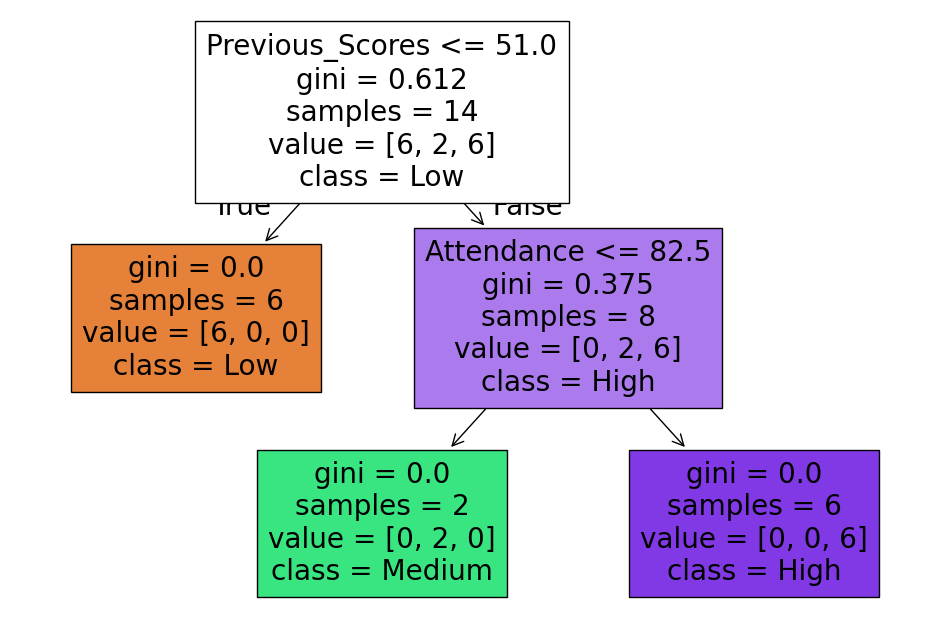

In [ ]:
# Step 5: Decision Tree Rules
print("\n🌳 Decision Tree Rules:\n")
print(export_text(clf, feature_names=list(X.columns)))

# Plot tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=["Low","Medium","High"], filled=True)
plt.show()